In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [27]:
df = pd.read_csv("iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [28]:
X = df.drop("variety",axis=1)
Y = df["variety"]
print(X)
print(Y)

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object


In [29]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [32]:
print("Train Size: ",X_train.shape)
print("Test Size: ",X_test.shape)

Train Size:  (120, 4)
Test Size:  (30, 4)


In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
test = scaler.transform(X_train)
df = pd.DataFrame(test)
df

,0,1,2,3
0,0.275019,-0.636927,0.510894,-0.015604
1,1.221322,0.119818,0.740940,1.455607
2,-1.026147,0.876563,-1.271963,-1.085575
3,0.748170,-0.132430,0.798451,1.054368
4,-0.316420,-1.393672,0.050802,-0.149350
...,...,...,...,...
115,-0.316420,-0.384679,-0.121733,0.118143
116,0.629883,-0.384679,0.280848,0.118143
117,1.812761,-0.636927,1.316055,0.920621
118,-0.907859,-1.393672,-0.466802,-0.149350


In [37]:
# 5. Calculate the % of missing values in a column. 
# 6. Remove features with missing values (&gt;20%) 
# 7. If the missing values is &lt;20%,do data imputation(mean/median) 
# 8. Remove the outliers. 
# WE HAVE ALREADY DONE THESE IN EXP 1 pls refer that :)


In [44]:
# Still need to understand this code more ... :(
selector = VarianceThreshold()
selector.fit(X_train)
varience = selector.variances_
features_kept = selector.get_support(indices=True)
print("Variances in each feature:", varience)
print("Indices of non-constant features:", features_kept)
print("Indices of constant features:", np.where(varience == 0)[0])
# 10. Remove features with low variance 
# Just a if condition you know if u know .. :) 

Variances in each feature: [0.71469375 0.15716042 3.02336389 0.55903056]
Indices of non-constant features: [0 1 2 3]
Indices of constant features: []


In [45]:
# 11. Remove highly correlated features 
# Already did corr in exp 1 same just remove when it is hight simple :)

In [72]:
df = pd.read_csv("iris.csv")
X = df.drop("variety",axis=1)
X['dummy']=X['petal.length']
Y = df['variety']

In [73]:
X

,sepal.length,sepal.width,petal.length,petal.width,dummy
0,5.1,3.5,1.4,0.2,1.4
1,4.9,3.0,1.4,0.2,1.4
2,4.7,3.2,1.3,0.2,1.3
3,4.6,3.1,1.5,0.2,1.5
4,5.0,3.6,1.4,0.2,1.4
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,5.2
146,6.3,2.5,5.0,1.9,5.0
147,6.5,3.0,5.2,2.0,5.2
148,6.2,3.4,5.4,2.3,5.4


In [80]:
df = pd.read_csv("iris.csv")
randome_name = ["apple","good","dead","alive","idk","just garbage","remo","reny"]
for x in randome_name:
    df[x]=1


In [86]:
df.shape

(150, 13)

In [83]:
X = df.drop("variety",axis=1)
Y = df["variety"]

In [84]:
kbest = SelectKBest(score_func=f_classif,k=5)
new_data = kbest.fit_transform(X,Y)


/home/remo/Documents/MLT_Shortworks/MLT_exp/1_EXPLORATORY_DATA_ANALYSIS/.conda/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 4  5  6  7  8  9 10 11] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/remo/Documents/MLT_Shortworks/MLT_exp/1_EXPLORATORY_DATA_ANALYSIS/.conda/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [85]:
new_data.shape

(150, 5)

In [88]:
# in similar way u can also use SelectPercentile :)
# select_percentile = SelectPercentile(score_func=f_classif, percentile=20)
# X_new_percentile = select_percentile.fit_transform(X, y)


In [95]:
df = pd.read_csv("iris.csv")
df.drop("variety",axis=1,inplace=True)

pearson_corr = df.corr(method="pearson")
spearman_corr = df.corr(method="spearman")
print("PEARSON")
print(pearson_corr)
print()
print("SPEARMAN")
print(spearman_corr)

PEARSON
              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000

SPEARMAN
              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.166778      0.881898     0.834289
sepal.width      -0.166778     1.000000     -0.309635    -0.289032
petal.length      0.881898    -0.309635      1.000000     0.937667
petal.width       0.834289    -0.289032      0.937667     1.000000


<Axes: >

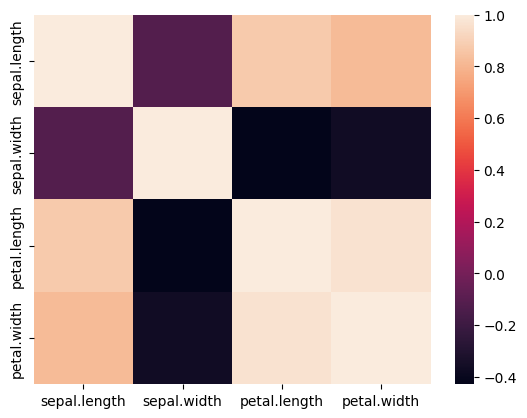

In [96]:
sns.heatmap(pearson_corr)

<Axes: >

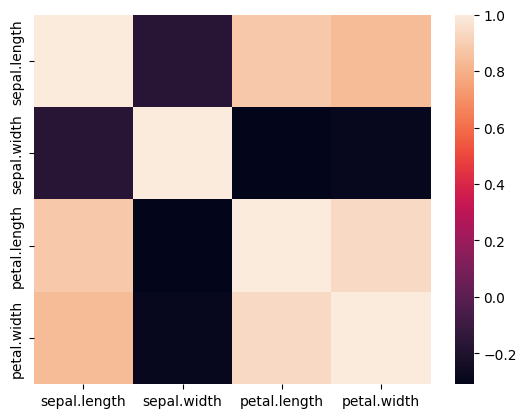

In [97]:
sns.heatmap(spearman_corr)

In [104]:
df = pd.read_csv("iris.csv")

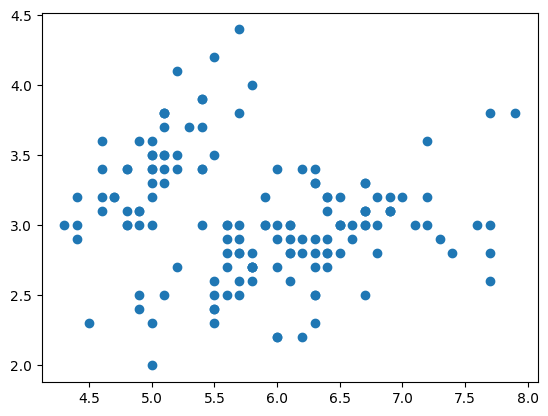

In [112]:
X = df[['sepal.length']]
Y = df[['sepal.width']]
plt.scatter(X,Y)

In [113]:
X['sepal.width']=Y['sepal.width']
X

/tmp/ipykernel_20419/2877018646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sepal.width']=Y['sepal.width']


,sepal.length,sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [114]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [117]:
X_transformed = pca.transform(X)
new_df = pd.DataFrame(X_transformed,columns=['length','width'])
new_df

,length,width
0,-0.778148,0.378133
1,-0.935090,-0.137007
2,-1.151308,0.045339
3,-1.242481,-0.062770
4,-0.886256,0.469306
...,...,...
145,0.858445,0.015414
146,0.502221,-0.516662
147,0.659163,-0.001522
148,0.326369,0.371638


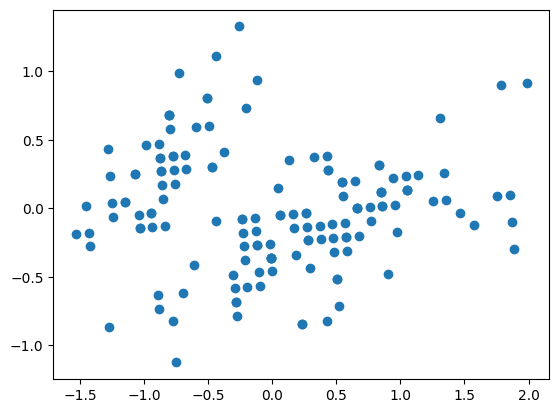

In [119]:
plt.scatter(new_df['length'],new_df['width'])

In [125]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(new_df,df['variety'])
# i did not understand much what it does but it looks like another normalization

In [126]:
X_lda

array([[ 2.81695886e+00, -3.21844199e-01],
       [ 1.86113987e+00,  8.89248441e-01],
       [ 2.84299737e+00,  6.33087586e-01],
       [ 2.78030427e+00,  9.24222443e-01],
       [ 3.30788761e+00, -4.49924626e-01],
       [ 3.28184910e+00, -1.40485641e+00],
       [ 3.61073705e+00,  2.95399517e-01],
       [ 2.75426576e+00, -3.07093422e-02],
       [ 2.65491806e+00,  1.50649216e+00],
       [ 2.13795080e+00,  6.79640799e-01],
       [ 2.72822725e+00, -9.85641127e-01],
       [ 3.18250141e+00,  1.32345087e-01],
       [ 2.07525770e+00,  9.70775655e-01],
       [ 3.14584681e+00,  1.37841173e+00],
       [ 2.70218874e+00, -1.94057291e+00],
       [ 4.02355027e+00, -2.69747627e+00],
       [ 3.28184910e+00, -1.40485641e+00],
       [ 2.81695886e+00, -3.21844199e-01],
       [ 2.36268470e+00, -1.43983041e+00],
       [ 3.64739165e+00, -9.50667125e-01],
       [ 1.89779446e+00, -3.56818201e-01],
       [ 3.37058072e+00, -7.41059483e-01],
       [ 4.16435891e+00, -1.23815767e-01],
       [ 2.